<a href="https://colab.research.google.com/github/wilsonfmjr/PPGEEC2321---REDES-NEURAIS-E-DEEP-LEARNING/blob/main/Questao_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# INSTALAR MiniSom no Google Colab
!pip install minisom

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.26777631196516777


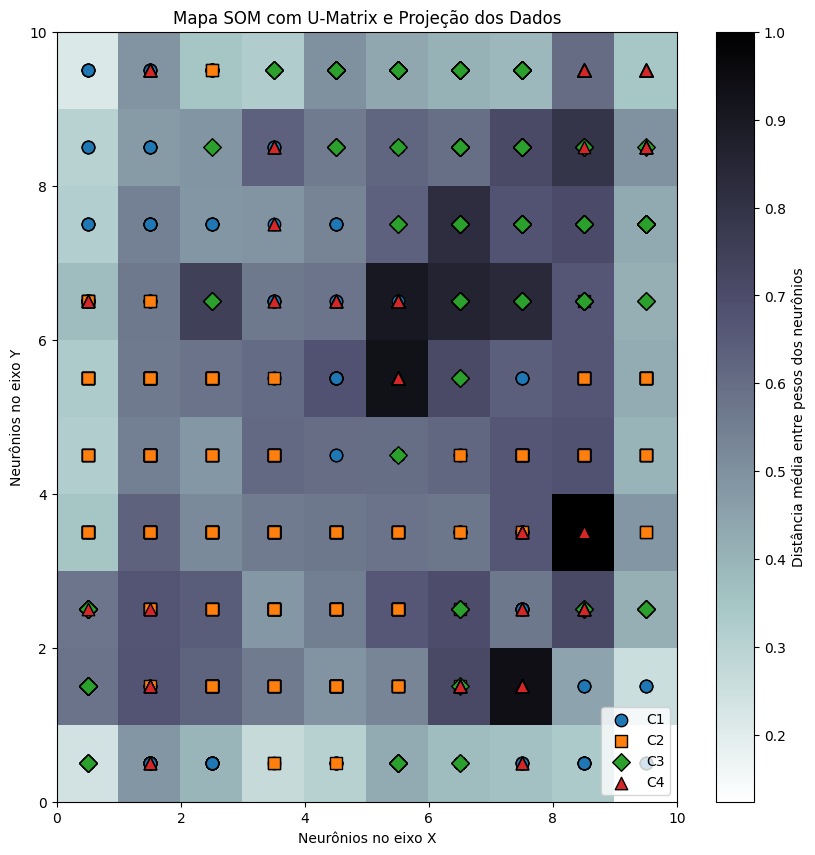

In [ ]:
# ============================
# 1. IMPORTAÇÃO DE BIBLIOTECAS
# ============================

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom

# ============================
# 2. GERAR OS DADOS GAUSSIANOS
# ============================

np.random.seed(42)
n_samples = 250
dim = 8

# Centros das distribuições
m1 = np.zeros(dim)
m2 = np.array([4, 0, 0, 0, 0, 0, 0, 0])
m3 = np.array([0, 0, 0, 4, 0, 0, 0, 0])
m4 = np.array([0, 0, 0, 0, 0, 0, 0, 4])

# Gerar dados normalizados com variância 1
C1 = np.random.randn(n_samples, dim) + m1
C2 = np.random.randn(n_samples, dim) + m2
C3 = np.random.randn(n_samples, dim) + m3
C4 = np.random.randn(n_samples, dim) + m4

X = np.vstack([C1, C2, C3, C4])
y = np.array([0]*n_samples + [1]*n_samples + [2]*n_samples + [3]*n_samples)

# ============================
# 3. NORMALIZAÇÃO
# ============================

scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)

# ============================
# 4. TREINAMENTO DO SOM
# ============================

som_shape = (10, 10)
som = MiniSom(x=som_shape[0], y=som_shape[1], input_len=dim, sigma=1.0, learning_rate=0.5)
som.random_weights_init(X_norm)
som.train(X_norm, 1000, verbose=True)

# ============================
# 5. CÁLCULO DA U-MATRIX
# ============================

u_matrix = som.distance_map()  # distância média entre neurônios vizinhos

# ============================
# 6. VISUALIZAÇÃO DA U-MATRIX + DADOS
# ============================

plt.figure(figsize=(10, 10))
plt.pcolor(u_matrix.T, cmap='bone_r')  # exibe a U-matrix
plt.colorbar(label='Distância média entre pesos dos neurônios')

# Obter os BMUs
win_map = np.array([som.winner(x) for x in X_norm])
cores = ['C0', 'C1', 'C2', 'C3']
marcadores = ['o', 's', 'D', '^']

# Sobrepor os dados
for i, label in enumerate(np.unique(y)):
    idx = y == label
    pontos = win_map[idx]
    plt.scatter(pontos[:, 0] + 0.5, pontos[:, 1] + 0.5,  # +0.5 para centralizar no quadrado
                c=cores[i], marker=marcadores[i], label=f'C{label+1}',
                edgecolors='k', s=80)

plt.title('Mapa SOM com U-Matrix e Projeção dos Dados')
plt.xlabel('Neurônios no eixo X')
plt.ylabel('Neurônios no eixo Y')
plt.legend()
plt.grid(False)
plt.show()

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.2656777972615005


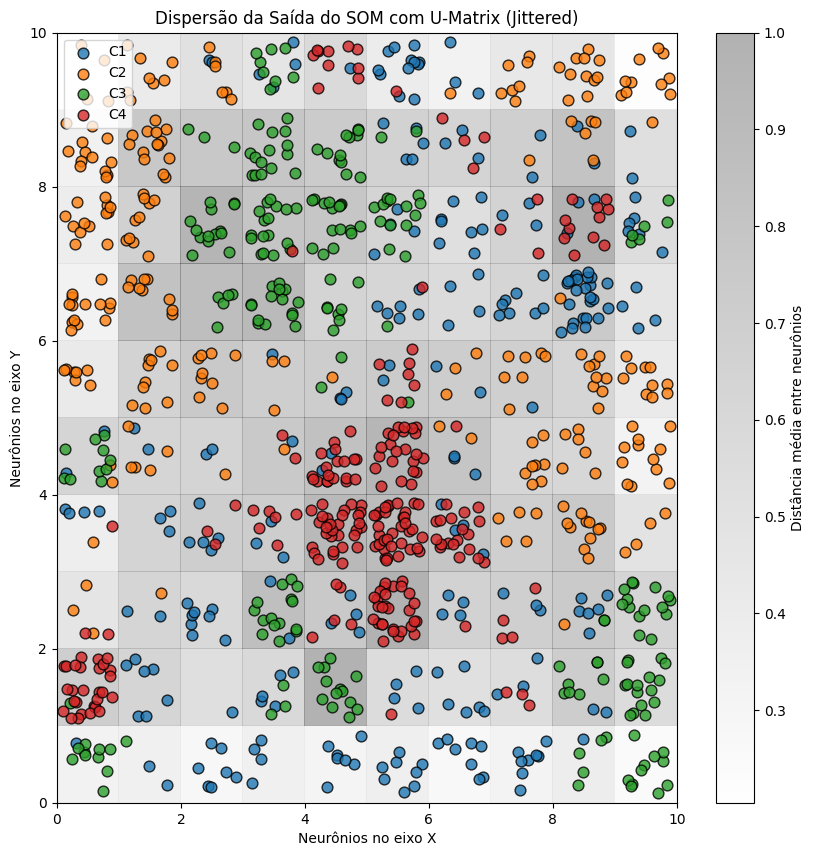

In [ ]:
# ============================
# 1. IMPORTAÇÃO DE BIBLIOTECAS
# ============================

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom

# ============================
# 2. GERAR OS DADOS GAUSSIANOS
# ============================

np.random.seed(42)
n_samples = 250
dim = 8

m1 = np.zeros(dim)
m2 = np.array([4, 0, 0, 0, 0, 0, 0, 0])
m3 = np.array([0, 0, 0, 4, 0, 0, 0, 0])
m4 = np.array([0, 0, 0, 0, 0, 0, 0, 4])

C1 = np.random.randn(n_samples, dim) + m1
C2 = np.random.randn(n_samples, dim) + m2
C3 = np.random.randn(n_samples, dim) + m3
C4 = np.random.randn(n_samples, dim) + m4

X = np.vstack([C1, C2, C3, C4])
y = np.array([0]*n_samples + [1]*n_samples + [2]*n_samples + [3]*n_samples)

# ============================
# 3. NORMALIZAÇÃO
# ============================

scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)

# ============================
# 4. TREINAMENTO DO SOM
# ============================

som_shape = (10, 10)
som = MiniSom(x=som_shape[0], y=som_shape[1], input_len=dim, sigma=1.0, learning_rate=0.5)
som.random_weights_init(X_norm)
som.train(X_norm, 1000, verbose=True)

# ============================
# 5. U-MATRIX + DISPERSÃO DA SAÍDA (MELHOR VISUAL)
# ============================

# Vencedores para cada dado
w_x, w_y = zip(*[som.winner(d) for d in X_norm])
w_x = np.array(w_x)
w_y = np.array(w_y)

# Cores e marcadores
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
labels_clusters = ['C1', 'C2', 'C3', 'C4']

# Plot da U-Matrix
plt.figure(figsize=(10, 10))
plt.pcolor(som.distance_map().T, cmap='gist_yarg', shading='auto', alpha=0.3)
plt.colorbar(label='Distância média entre neurônios')

# Dispersão dos dados sobre o mapa com jitter (offset aleatório para evitar sobreposição)
for c in np.unique(y):
    idx = y == c
    jitter_x = w_x[idx] + 0.5 + (np.random.rand(np.sum(idx)) - 0.5) * 0.8
    jitter_y = w_y[idx] + 0.5 + (np.random.rand(np.sum(idx)) - 0.5) * 0.8
    plt.scatter(jitter_x, jitter_y,
                s=60,
                c=colors[c],
                label=labels_clusters[c],
                edgecolors='k',
                alpha=0.8)

plt.title('Dispersão da Saída do SOM com U-Matrix (Jittered)')
plt.xlabel('Neurônios no eixo X')
plt.ylabel('Neurônios no eixo Y')
plt.legend()
plt.grid(False)
plt.show()